# Acquiring Beer Data 

From Brewerydb: https://www.brewerydb.com/

In [31]:
#import dependencies
import api_setup as ap
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
beer_data = pd.DataFrame()
# withBreweries and withIngredients are completely empty
beer_features = ['id', 'name', 'nameDisplay', 'abv', 'styleId', 'year', 'glasswareId','isOrganic', 'breweries', 'glasswareId', 'isRetired', 'status', 'statusDisplay']

for feature in beer_features:
    beer_data[feature]=''

count=0
for p in tqdm(range(1,24)):
    data = ap.get_data(page=p, custom='&withBreweries=Y&withIngredients=Y')
    try:
        for i in range(50):
            for feature in beer_features:
                if feature == 'breweries':
                    beer_data.set_value(count,feature,data['data'][i][feature][0]['id'])
                else:
                    try:
                        beer_data.set_value(count,feature,data['data'][i][feature])

                    except Exception as e: 
                        print(f"name:{data['data'][i]['name']}, page:{p}, item:{i}, feature:{feature}, error:{e}")
            count+=1
    except Exception as e:
        print(e)
                      
                      

  0%|                                                                                           | 0/23 [00:00<?, ?it/s]C:\Users\sponr\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


name:'Murican Pilsner, page:1, item:0, feature:year, error:'year'


C:\Users\sponr\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


name:11.5° PLATO, page:1, item:1, feature:year, error:'year'
name:11.5° PLATO, page:1, item:1, feature:glasswareId, error:'glasswareId'
name:11.5° PLATO, page:1, item:1, feature:glasswareId, error:'glasswareId'
name:12th Of Never, page:1, item:2, feature:year, error:'year'
name:12th Of Never, page:1, item:2, feature:glasswareId, error:'glasswareId'
name:12th Of Never, page:1, item:2, feature:glasswareId, error:'glasswareId'
name:15th Anniversary Ale, page:1, item:3, feature:abv, error:'abv'
name:15th Anniversary Ale, page:1, item:3, feature:year, error:'year'
name:15th Anniversary Ale, page:1, item:3, feature:glasswareId, error:'glasswareId'
name:15th Anniversary Ale, page:1, item:3, feature:glasswareId, error:'glasswareId'
name:16 So Fine Red Wheat Wine, page:1, item:4, feature:year, error:'year'
name:16 So Fine Red Wheat Wine, page:1, item:4, feature:glasswareId, error:'glasswareId'
name:16 So Fine Red Wheat Wine, page:1, item:4, feature:glasswareId, error:'glasswareId'
name:1794 The

name:7 Birds, page:1, item:36, feature:year, error:'year'
name:7 Birds, page:1, item:36, feature:glasswareId, error:'glasswareId'
name:7 Birds, page:1, item:36, feature:glasswareId, error:'glasswareId'
name:7 Cities Pilsner, page:1, item:37, feature:year, error:'year'
name:7 Cities Pilsner, page:1, item:37, feature:glasswareId, error:'glasswareId'
name:7 Cities Pilsner, page:1, item:37, feature:glasswareId, error:'glasswareId'
name:72 Imperial, page:1, item:38, feature:year, error:'year'
name:72 Imperial, page:1, item:38, feature:glasswareId, error:'glasswareId'
name:72 Imperial, page:1, item:38, feature:glasswareId, error:'glasswareId'
name:A Beer Named Sue, page:1, item:39, feature:year, error:'year'
name:A Beer Named Sue, page:1, item:39, feature:glasswareId, error:'glasswareId'
name:A Beer Named Sue, page:1, item:39, feature:glasswareId, error:'glasswareId'
name:A Little Sumpin' Extra, page:1, item:40, feature:year, error:'year'
name:A Little Sumpin' Extra, page:1, item:40, feature

  4%|███▌                                                                               | 1/23 [00:02<00:48,  2.18s/it]

name:ALTitude, page:2, item:1, feature:abv, error:'abv'
name:ALTitude, page:2, item:1, feature:year, error:'year'
name:ALTitude, page:2, item:1, feature:glasswareId, error:'glasswareId'
name:ALTitude, page:2, item:1, feature:glasswareId, error:'glasswareId'
name:Amber Beer, page:2, item:2, feature:abv, error:'abv'
name:Amber Beer, page:2, item:2, feature:year, error:'year'
name:Amber Beer, page:2, item:2, feature:glasswareId, error:'glasswareId'
name:Amber Beer, page:2, item:2, feature:glasswareId, error:'glasswareId'
name:American Summer Hoppy Wit, page:2, item:3, feature:year, error:'year'
name:American Summer Hoppy Wit, page:2, item:3, feature:glasswareId, error:'glasswareId'
name:American Summer Hoppy Wit, page:2, item:3, feature:glasswareId, error:'glasswareId'
name:Añejo Tequila Barrel Aged Gubna, page:2, item:4, feature:year, error:'year'
name:Añejo Tequila Barrel Aged Gubna, page:2, item:4, feature:glasswareId, error:'glasswareId'
name:Añejo Tequila Barrel Aged Gubna, page:2, i

name:Barrel Aged Imperial Cherry Stout, page:2, item:37, feature:year, error:'year'
name:Barrel Aged Imperial Cherry Stout, page:2, item:37, feature:glasswareId, error:'glasswareId'
name:Barrel Aged Imperial Cherry Stout, page:2, item:37, feature:glasswareId, error:'glasswareId'
name:Barrel Aged Mama's Mama's Little Yella Pils (Tequila), page:2, item:38, feature:year, error:'year'
name:Barrel Aged Mama's Mama's Little Yella Pils (Tequila), page:2, item:38, feature:glasswareId, error:'glasswareId'
name:Barrel Aged Mama's Mama's Little Yella Pils (Tequila), page:2, item:38, feature:glasswareId, error:'glasswareId'
name:Barrel Aged Narwhal, page:2, item:39, feature:year, error:'year'
name:Barrel Aged Narwhal, page:2, item:39, feature:glasswareId, error:'glasswareId'
name:Barrel Aged Narwhal, page:2, item:39, feature:glasswareId, error:'glasswareId'
name:Barrel Aged Nuovo Record, page:2, item:40, feature:year, error:'year'
name:Barrel Aged Nuovo Record, page:2, item:40, feature:glasswareId

  9%|███████▏                                                                           | 2/23 [00:03<00:42,  2.03s/it]

name:Bayside Black IPA, page:3, item:0, feature:year, error:'year'
name:Bayside Black IPA, page:3, item:0, feature:glasswareId, error:'glasswareId'
name:Bayside Black IPA, page:3, item:0, feature:glasswareId, error:'glasswareId'
name:Beach Bum Blonde Ale, page:3, item:1, feature:year, error:'year'
name:Beach Bum Blonde Ale, page:3, item:1, feature:glasswareId, error:'glasswareId'
name:Beach Bum Blonde Ale, page:3, item:1, feature:glasswareId, error:'glasswareId'
name:Bearsharktopus, page:3, item:2, feature:year, error:'year'
name:Bearsharktopus, page:3, item:2, feature:glasswareId, error:'glasswareId'
name:Bearsharktopus, page:3, item:2, feature:glasswareId, error:'glasswareId'
name:Bearwalker Barrel Aged Double Maple, page:3, item:3, feature:year, error:'year'
name:Bearwalker Barrel Aged Double Maple, page:3, item:3, feature:glasswareId, error:'glasswareId'
name:Bearwalker Barrel Aged Double Maple, page:3, item:3, feature:glasswareId, error:'glasswareId'
name:Bearwalker Brown, page:3,

name:Belle Meade Bourbon Sour, page:3, item:35, feature:year, error:'year'
name:Belle Meade Bourbon Sour, page:3, item:35, feature:glasswareId, error:'glasswareId'
name:Belle Meade Bourbon Sour, page:3, item:35, feature:glasswareId, error:'glasswareId'
name:Bernie Weisse, page:3, item:36, feature:year, error:'year'
name:Bernie Weisse, page:3, item:36, feature:glasswareId, error:'glasswareId'
name:Bernie Weisse, page:3, item:36, feature:glasswareId, error:'glasswareId'
name:Betsy's Revenge, page:3, item:37, feature:year, error:'year'
name:Betsy's Revenge, page:3, item:37, feature:glasswareId, error:'glasswareId'
name:Betsy's Revenge, page:3, item:37, feature:glasswareId, error:'glasswareId'
name:BFD - Beer For Drinking, page:3, item:38, feature:year, error:'year'
name:BFD - Beer For Drinking, page:3, item:38, feature:glasswareId, error:'glasswareId'
name:BFD - Beer For Drinking, page:3, item:38, feature:glasswareId, error:'glasswareId'
name:Bigfoot, page:3, item:39, feature:glasswareId,

 13%|██████████▊                                                                        | 3/23 [00:05<00:37,  1.88s/it]

name:Bigfoot, page:4, item:0, feature:glasswareId, error:'glasswareId'
name:Bigfoot, page:4, item:0, feature:glasswareId, error:'glasswareId'
name:Bigfoot, page:4, item:1, feature:glasswareId, error:'glasswareId'
name:Bigfoot, page:4, item:1, feature:glasswareId, error:'glasswareId'
name:Bigfoot, page:4, item:2, feature:glasswareId, error:'glasswareId'
name:Bigfoot, page:4, item:2, feature:glasswareId, error:'glasswareId'
name:Bigfoot, page:4, item:3, feature:glasswareId, error:'glasswareId'
name:Bigfoot, page:4, item:3, feature:glasswareId, error:'glasswareId'
name:Bigfoot, page:4, item:4, feature:year, error:'year'
name:Bigfoot, page:4, item:5, feature:glasswareId, error:'glasswareId'
name:Bigfoot, page:4, item:5, feature:glasswareId, error:'glasswareId'
name:Bigfoot (2016), page:4, item:6, feature:year, error:'year'
name:Bigfoot (2016), page:4, item:6, feature:glasswareId, error:'glasswareId'
name:Bigfoot (2016), page:4, item:6, feature:glasswareId, error:'glasswareId'
name:Bigfoot 

name:Bonnaroo Brew, page:4, item:43, feature:year, error:'year'
name:Boomerang, page:4, item:44, feature:year, error:'year'
name:Boomerang, page:4, item:44, feature:glasswareId, error:'glasswareId'
name:Boomerang, page:4, item:44, feature:glasswareId, error:'glasswareId'
name:Born Again Yesterday, page:4, item:45, feature:year, error:'year'
name:Born Again Yesterday, page:4, item:45, feature:glasswareId, error:'glasswareId'
name:Born Again Yesterday, page:4, item:45, feature:glasswareId, error:'glasswareId'
name:Born Yesterday, page:4, item:46, feature:year, error:'year'
name:Born Yesterday, page:4, item:46, feature:glasswareId, error:'glasswareId'
name:Born Yesterday, page:4, item:46, feature:glasswareId, error:'glasswareId'
name:Bosden, page:4, item:47, feature:year, error:'year'
name:Bosden, page:4, item:47, feature:glasswareId, error:'glasswareId'
name:Bosden, page:4, item:47, feature:glasswareId, error:'glasswareId'
name:Bottle Rocket IPA, page:4, item:48, feature:year, error:'yea

 17%|██████████████▍                                                                    | 4/23 [00:06<00:33,  1.77s/it]

name:Bourbon Barrel Aged Imperial Stout With Coffee, page:5, item:0, feature:year, error:'year'
name:Bourbon Barrel Aged Imperial Stout With Coffee, page:5, item:0, feature:glasswareId, error:'glasswareId'
name:Bourbon Barrel Aged Imperial Stout With Coffee, page:5, item:0, feature:glasswareId, error:'glasswareId'
name:Bourbon Barrel Aged Maillard's Odyssey, page:5, item:1, feature:abv, error:'abv'
name:Bourbon Barrel Aged Maillard's Odyssey, page:5, item:1, feature:year, error:'year'
name:Bourbon Barrel Aged Maillard's Odyssey, page:5, item:1, feature:glasswareId, error:'glasswareId'
name:Bourbon Barrel Aged Maillard's Odyssey, page:5, item:1, feature:glasswareId, error:'glasswareId'
name:Brandy Barrel-Aged Ten Fidy, page:5, item:2, feature:year, error:'year'
name:Brandy Barrel-Aged Ten Fidy, page:5, item:2, feature:glasswareId, error:'glasswareId'
name:Brandy Barrel-Aged Ten Fidy, page:5, item:2, feature:glasswareId, error:'glasswareId'
name:Brass & Blues, page:5, item:3, feature:yea

name:Buffalo Trace Aged Scotch Ale, page:5, item:40, feature:glasswareId, error:'glasswareId'
name:Buffalo Trace Aged Scotch Ale, page:5, item:40, feature:glasswareId, error:'glasswareId'
name:Buffalo Trace Barrel-Aged Bearwalker, page:5, item:41, feature:abv, error:'abv'
name:Buffalo Trace Barrel-Aged Bearwalker, page:5, item:41, feature:year, error:'year'
name:Buffalo Trace Barrel-Aged Bearwalker, page:5, item:41, feature:glasswareId, error:'glasswareId'
name:Buffalo Trace Barrel-Aged Bearwalker, page:5, item:41, feature:glasswareId, error:'glasswareId'
name:Bulleit Bourbon Ten Fidy, page:5, item:42, feature:abv, error:'abv'
name:Bulleit Bourbon Ten Fidy, page:5, item:42, feature:year, error:'year'
name:Bulleit Bourbon Ten Fidy, page:5, item:42, feature:glasswareId, error:'glasswareId'
name:Bulleit Bourbon Ten Fidy, page:5, item:42, feature:glasswareId, error:'glasswareId'
name:Bulleit Bourbon Ten Fidy, page:5, item:43, feature:glasswareId, error:'glasswareId'
name:Bulleit Bourbon Te

 22%|██████████████████                                                                 | 5/23 [00:09<00:36,  2.00s/it]

name:Cambium, page:6, item:0, feature:year, error:'year'
name:Cambium, page:6, item:0, feature:glasswareId, error:'glasswareId'
name:Cambium, page:6, item:0, feature:glasswareId, error:'glasswareId'
name:Cappuccino Stout, page:6, item:2, feature:year, error:'year'
name:Cask-Aid, page:6, item:3, feature:styleId, error:'styleId'
name:Cask-Aid, page:6, item:3, feature:year, error:'year'
name:Casper The Friendly Gose, page:6, item:4, feature:year, error:'year'
name:Casper The Friendly Gose, page:6, item:4, feature:glasswareId, error:'glasswareId'
name:Casper The Friendly Gose, page:6, item:4, feature:glasswareId, error:'glasswareId'
name:Celebration Ale, page:6, item:5, feature:year, error:'year'
name:Celebration Ale 1992, page:6, item:6, feature:abv, error:'abv'
name:Celebration Ale 1992, page:6, item:6, feature:year, error:'year'
name:Celebration Ale 1992, page:6, item:6, feature:glasswareId, error:'glasswareId'
name:Celebration Ale 1992, page:6, item:6, feature:glasswareId, error:'glass

name:Collabinator Wit, page:6, item:40, feature:year, error:'year'
name:Collabinator Wit, page:6, item:40, feature:glasswareId, error:'glasswareId'
name:Collabinator Wit, page:6, item:40, feature:glasswareId, error:'glasswareId'
name:Conehead, page:6, item:41, feature:year, error:'year'
name:Conehead, page:6, item:41, feature:glasswareId, error:'glasswareId'
name:Conehead, page:6, item:41, feature:glasswareId, error:'glasswareId'
name:Cool Breeze, page:6, item:42, feature:year, error:'year'
name:Cool Breeze, page:6, item:42, feature:glasswareId, error:'glasswareId'
name:Cool Breeze, page:6, item:42, feature:glasswareId, error:'glasswareId'
name:Cornlaboration, page:6, item:43, feature:year, error:'year'
name:Cornlaboration, page:6, item:43, feature:glasswareId, error:'glasswareId'
name:Cornlaboration, page:6, item:43, feature:glasswareId, error:'glasswareId'
name:Corsair Buckwheat Porter, page:6, item:44, feature:abv, error:'abv'
name:Corsair Buckwheat Porter, page:6, item:44, feature:

 26%|█████████████████████▋                                                             | 6/23 [00:11<00:33,  1.97s/it]

name:Crank Tank Rye'd Ale, page:7, item:0, feature:year, error:'year'
name:Crank Tank Rye'd Ale, page:7, item:0, feature:glasswareId, error:'glasswareId'
name:Crank Tank Rye'd Ale, page:7, item:0, feature:glasswareId, error:'glasswareId'
name:Cream Ale, page:7, item:1, feature:year, error:'year'
name:Cream Ale, page:7, item:1, feature:glasswareId, error:'glasswareId'
name:Cream Ale, page:7, item:1, feature:glasswareId, error:'glasswareId'
name:Cream Ale, page:7, item:2, feature:year, error:'year'
name:Credits & Debits, page:7, item:3, feature:year, error:'year'
name:Credits & Debits, page:7, item:3, feature:glasswareId, error:'glasswareId'
name:Credits & Debits, page:7, item:3, feature:glasswareId, error:'glasswareId'
name:Crye Me A River, page:7, item:4, feature:year, error:'year'
name:Crye Me A River, page:7, item:4, feature:glasswareId, error:'glasswareId'
name:Crye Me A River, page:7, item:4, feature:glasswareId, error:'glasswareId'
name:CSB ESB, page:7, item:5, feature:abv, error:

name:Demon Brewn, page:7, item:37, feature:glasswareId, error:'glasswareId'
name:Demon Brewn, page:7, item:37, feature:glasswareId, error:'glasswareId'
name:Deuce, page:7, item:38, feature:year, error:'year'
name:Deuce, page:7, item:38, feature:glasswareId, error:'glasswareId'
name:Deuce, page:7, item:38, feature:glasswareId, error:'glasswareId'
name:DevESTATEtion, page:7, item:39, feature:year, error:'year'
name:Deviant Dale’s, page:7, item:40, feature:year, error:'year'
name:Devil Dog Imperial IPA, page:7, item:41, feature:year, error:'year'
name:Devil Dog Imperial IPA, page:7, item:41, feature:glasswareId, error:'glasswareId'
name:Devil Dog Imperial IPA, page:7, item:41, feature:glasswareId, error:'glasswareId'
name:Devils Double, page:7, item:42, feature:year, error:'year'
name:Devils Double, page:7, item:42, feature:glasswareId, error:'glasswareId'
name:Devils Double, page:7, item:42, feature:glasswareId, error:'glasswareId'
name:Diggler Double IPA, page:7, item:43, feature:year, 

 30%|█████████████████████████▎                                                         | 7/23 [00:12<00:29,  1.86s/it]

name:Doppel Weizen, page:8, item:0, feature:year, error:'year'
name:Doppelbock, page:8, item:1, feature:abv, error:'abv'
name:Doppelbock, page:8, item:1, feature:year, error:'year'
name:Doppelbock, page:8, item:1, feature:glasswareId, error:'glasswareId'
name:Doppelbock, page:8, item:1, feature:glasswareId, error:'glasswareId'
name:Double DeBOCKel, page:8, item:2, feature:year, error:'year'
name:Double DeBOCKel, page:8, item:2, feature:glasswareId, error:'glasswareId'
name:Double DeBOCKel, page:8, item:2, feature:glasswareId, error:'glasswareId'
name:Dragon's Milk, page:8, item:4, feature:year, error:'year'
name:Dragon's Milk Reserve Coconut Rum, page:8, item:5, feature:year, error:'year'
name:Dragon's Milk Reserve Coconut Rum, page:8, item:5, feature:glasswareId, error:'glasswareId'
name:Dragon's Milk Reserve Coconut Rum, page:8, item:5, feature:glasswareId, error:'glasswareId'
name:Dragon's Milk Reserve Mexican Spice Cake, page:8, item:6, feature:year, error:'year'
name:Dragon's Milk

name:Eroica, page:8, item:38, feature:glasswareId, error:'glasswareId'
name:ESB, page:8, item:39, feature:year, error:'year'
name:ESB, page:8, item:39, feature:glasswareId, error:'glasswareId'
name:ESB, page:8, item:39, feature:glasswareId, error:'glasswareId'
name:ESB - Early Spring Beer, page:8, item:40, feature:year, error:'year'
name:Estate Ale, page:8, item:41, feature:year, error:'year'
name:Existential, page:8, item:42, feature:year, error:'year'
name:Existential, page:8, item:42, feature:glasswareId, error:'glasswareId'
name:Existential, page:8, item:42, feature:glasswareId, error:'glasswareId'
name:Experimental Hop Double IPA, page:8, item:43, feature:year, error:'year'
name:Experimental Hop Double IPA, page:8, item:43, feature:glasswareId, error:'glasswareId'
name:Experimental Hop Double IPA, page:8, item:43, feature:glasswareId, error:'glasswareId'
name:EXPERIMENTAL HOP PILSNER, page:8, item:44, feature:year, error:'year'
name:EXPERIMENTAL HOP PILSNER, page:8, item:44, featu

 35%|████████████████████████████▊                                                      | 8/23 [00:14<00:28,  1.88s/it]

name:Family Values, page:9, item:0, feature:year, error:'year'
name:Family Values, page:9, item:0, feature:glasswareId, error:'glasswareId'
name:Family Values, page:9, item:0, feature:glasswareId, error:'glasswareId'
name:Fandom Ale Fusion XXXIX, page:9, item:1, feature:year, error:'year'
name:Fandom Ale Fusion XXXIX, page:9, item:1, feature:glasswareId, error:'glasswareId'
name:Fandom Ale Fusion XXXIX, page:9, item:1, feature:glasswareId, error:'glasswareId'
name:Farmhouse Hatter, page:9, item:2, feature:year, error:'year'
name:Fat Slim, page:9, item:3, feature:year, error:'year'
name:Fat Slim, page:9, item:3, feature:glasswareId, error:'glasswareId'
name:Fat Slim, page:9, item:3, feature:glasswareId, error:'glasswareId'
name:Festival Bier, page:9, item:4, feature:year, error:'year'
name:Festival Bier, page:9, item:4, feature:glasswareId, error:'glasswareId'
name:Festival Bier, page:9, item:4, feature:glasswareId, error:'glasswareId'
name:Festive Ale, page:9, item:5, feature:glassware

name:Fusion 18, page:9, item:37, feature:glasswareId, error:'glasswareId'
name:Fusion 20, page:9, item:38, feature:year, error:'year'
name:Fusion 20, page:9, item:38, feature:glasswareId, error:'glasswareId'
name:Fusion 20, page:9, item:38, feature:glasswareId, error:'glasswareId'
name:Fusion 21, page:9, item:39, feature:year, error:'year'
name:Fusion 21, page:9, item:39, feature:glasswareId, error:'glasswareId'
name:Fusion 21, page:9, item:39, feature:glasswareId, error:'glasswareId'
name:Fusion 22, page:9, item:40, feature:year, error:'year'
name:Fusion 22, page:9, item:40, feature:glasswareId, error:'glasswareId'
name:Fusion 22, page:9, item:40, feature:glasswareId, error:'glasswareId'
name:Fusion 23, page:9, item:41, feature:year, error:'year'
name:Fusion 23, page:9, item:41, feature:glasswareId, error:'glasswareId'
name:Fusion 23, page:9, item:41, feature:glasswareId, error:'glasswareId'
name:Fusion 24, page:9, item:42, feature:year, error:'year'
name:Fusion 24, page:9, item:42, f

 39%|████████████████████████████████▍                                                  | 9/23 [00:16<00:26,  1.89s/it]

name:Fusion 48, page:10, item:0, feature:year, error:'year'
name:Fusion 48, page:10, item:0, feature:glasswareId, error:'glasswareId'
name:Fusion 48, page:10, item:0, feature:glasswareId, error:'glasswareId'
name:Fusion 49, page:10, item:1, feature:year, error:'year'
name:Fusion 49, page:10, item:1, feature:glasswareId, error:'glasswareId'
name:Fusion 49, page:10, item:1, feature:glasswareId, error:'glasswareId'
name:Fusion 9, page:10, item:2, feature:year, error:'year'
name:Fusion 9, page:10, item:2, feature:glasswareId, error:'glasswareId'
name:Fusion 9, page:10, item:2, feature:glasswareId, error:'glasswareId'
name:Fuzzworthy, page:10, item:3, feature:year, error:'year'
name:Fuzzworthy, page:10, item:3, feature:glasswareId, error:'glasswareId'
name:Fuzzworthy, page:10, item:3, feature:glasswareId, error:'glasswareId'
name:G'Afternoon, page:10, item:4, feature:year, error:'year'
name:G'Afternoon, page:10, item:4, feature:glasswareId, error:'glasswareId'
name:G'Afternoon, page:10, ite

name:Guinness Red Harvest Stout, page:10, item:47, feature:year, error:'year'
name:Guinness Rye Pale Ale, page:10, item:48, feature:year, error:'year'
name:Guinness Rye Pale Ale, page:10, item:48, feature:glasswareId, error:'glasswareId'
name:Guinness Rye Pale Ale, page:10, item:48, feature:glasswareId, error:'glasswareId'
name:Guinness Special Export, page:10, item:49, feature:year, error:'year'
name:Guinness Special Export, page:10, item:49, feature:glasswareId, error:'glasswareId'
name:Guinness Special Export, page:10, item:49, feature:glasswareId, error:'glasswareId'


 43%|███████████████████████████████████▋                                              | 10/23 [00:18<00:23,  1.84s/it]

name:Guinness West Indies Porter, page:11, item:0, feature:year, error:'year'
name:Guinness West Indies Porter, page:11, item:0, feature:glasswareId, error:'glasswareId'
name:Guinness West Indies Porter, page:11, item:0, feature:glasswareId, error:'glasswareId'
name:Hairy Highlander, page:11, item:1, feature:abv, error:'abv'
name:Hairy Highlander, page:11, item:1, feature:year, error:'year'
name:Hairy Highlander, page:11, item:1, feature:glasswareId, error:'glasswareId'
name:Hairy Highlander, page:11, item:1, feature:glasswareId, error:'glasswareId'
name:Happy Ending, page:11, item:2, feature:glasswareId, error:'glasswareId'
name:Happy Ending, page:11, item:2, feature:glasswareId, error:'glasswareId'
name:Happy Ending, page:11, item:3, feature:year, error:'year'
name:Harbin Lager, page:11, item:4, feature:year, error:'year'
name:Harbin Lager, page:11, item:4, feature:glasswareId, error:'glasswareId'
name:Harbin Lager, page:11, item:4, feature:glasswareId, error:'glasswareId'
name:Harmo

name:Holiday Ale (2011), page:11, item:38, feature:year, error:'year'
name:Holiday Haze, page:11, item:39, feature:year, error:'year'
name:Holiday Haze, page:11, item:39, feature:glasswareId, error:'glasswareId'
name:Holiday Haze, page:11, item:39, feature:glasswareId, error:'glasswareId'
name:Holiday Leftovers Ale, page:11, item:40, feature:year, error:'year'
name:Home Skillet, page:11, item:41, feature:year, error:'year'
name:Home Skillet, page:11, item:41, feature:glasswareId, error:'glasswareId'
name:Home Skillet, page:11, item:41, feature:glasswareId, error:'glasswareId'
name:Honey Blonde, page:11, item:42, feature:year, error:'year'
name:Honey Blonde, page:11, item:42, feature:glasswareId, error:'glasswareId'
name:Honey Blonde, page:11, item:42, feature:glasswareId, error:'glasswareId'
name:Hop And Sour, page:11, item:43, feature:year, error:'year'
name:Hop And Sour, page:11, item:43, feature:glasswareId, error:'glasswareId'
name:Hop And Sour, page:11, item:43, feature:glasswareI

 48%|███████████████████████████████████████▏                                          | 11/23 [00:20<00:24,  2.01s/it]

name:Hop House Lager, page:12, item:0, feature:year, error:'year'
name:Hop House Lager, page:12, item:0, feature:glasswareId, error:'glasswareId'
name:Hop House Lager, page:12, item:0, feature:glasswareId, error:'glasswareId'
name:Hop Hunter IPA, page:12, item:1, feature:year, error:'year'
name:Hop Hunter IPA, page:12, item:1, feature:glasswareId, error:'glasswareId'
name:Hop Hunter IPA, page:12, item:1, feature:glasswareId, error:'glasswareId'
name:Hop Peak, page:12, item:2, feature:year, error:'year'
name:Hop Peak, page:12, item:2, feature:glasswareId, error:'glasswareId'
name:Hop Peak, page:12, item:2, feature:glasswareId, error:'glasswareId'
name:Hop Secret 644, page:12, item:3, feature:styleId, error:'styleId'
name:Hop Secret 644, page:12, item:3, feature:year, error:'year'
name:Hop Secret 644, page:12, item:3, feature:glasswareId, error:'glasswareId'
name:Hop Secret 644, page:12, item:3, feature:glasswareId, error:'glasswareId'
name:Hop Smack Double, page:12, item:4, feature:year

name:Incorrigible, page:12, item:43, feature:glasswareId, error:'glasswareId'
name:Incorrigible Reserve, page:12, item:44, feature:year, error:'year'
name:Incorrigible Reserve, page:12, item:44, feature:glasswareId, error:'glasswareId'
name:Incorrigible Reserve, page:12, item:44, feature:glasswareId, error:'glasswareId'
name:India Farmhouse Ale, page:12, item:45, feature:year, error:'year'
name:India Farmhouse Ale, page:12, item:45, feature:glasswareId, error:'glasswareId'
name:India Farmhouse Ale, page:12, item:45, feature:glasswareId, error:'glasswareId'
name:India Pale Ale, page:12, item:46, feature:year, error:'year'
name:India Pale Ale, page:12, item:46, feature:glasswareId, error:'glasswareId'
name:India Pale Ale, page:12, item:46, feature:glasswareId, error:'glasswareId'
name:India Pale Ale IPA, page:12, item:47, feature:year, error:'year'
name:India Pale Ale IPA, page:12, item:47, feature:glasswareId, error:'glasswareId'
name:India Pale Ale IPA, page:12, item:47, feature:glassw

 52%|██████████████████████████████████████████▊                                       | 12/23 [00:24<00:26,  2.45s/it]

name:IPA, page:13, item:0, feature:year, error:'year'
name:IPA, page:13, item:0, feature:glasswareId, error:'glasswareId'
name:IPA, page:13, item:0, feature:glasswareId, error:'glasswareId'
name:IPA with Rosemary, page:13, item:1, feature:abv, error:'abv'
name:IPA with Rosemary, page:13, item:1, feature:year, error:'year'
name:IPA with Rosemary, page:13, item:1, feature:glasswareId, error:'glasswareId'
name:IPA with Rosemary, page:13, item:1, feature:glasswareId, error:'glasswareId'
name:Irish Wheat, page:13, item:2, feature:year, error:'year'
name:Irish Wheat, page:13, item:2, feature:glasswareId, error:'glasswareId'
name:Irish Wheat, page:13, item:2, feature:glasswareId, error:'glasswareId'
name:Jack's Pumpkin Spice Ale, page:13, item:3, feature:year, error:'year'
name:Jack's Pumpkin Spice Ale, page:13, item:3, feature:glasswareId, error:'glasswareId'
name:Jack's Pumpkin Spice Ale, page:13, item:3, feature:glasswareId, error:'glasswareId'
name:Jack-Ale-Lantern, page:13, item:4, featu

name:Liberty Blonde, page:13, item:37, feature:year, error:'year'
name:Liberty Blonde, page:13, item:37, feature:glasswareId, error:'glasswareId'
name:Liberty Blonde, page:13, item:37, feature:glasswareId, error:'glasswareId'
name:Life and Limb, page:13, item:38, feature:styleId, error:'styleId'
name:Life and Limb, page:13, item:38, feature:year, error:'year'
name:Liger Lager, page:13, item:39, feature:year, error:'year'
name:Liger Lager, page:13, item:39, feature:glasswareId, error:'glasswareId'
name:Liger Lager, page:13, item:39, feature:glasswareId, error:'glasswareId'
name:Light IPA, page:13, item:40, feature:year, error:'year'
name:Lime-a-Rita, page:13, item:41, feature:year, error:'year'
name:Lime-a-Rita, page:13, item:41, feature:glasswareId, error:'glasswareId'
name:Lime-a-Rita, page:13, item:41, feature:glasswareId, error:'glasswareId'
name:Little Birdy, page:13, item:42, feature:year, error:'year'
name:Little Birdy, page:13, item:42, feature:glasswareId, error:'glasswareId'
n

 57%|██████████████████████████████████████████████▎                                   | 13/23 [00:26<00:22,  2.26s/it]

name:Lost Dune, page:14, item:0, feature:year, error:'year'
name:Lost Dune, page:14, item:0, feature:glasswareId, error:'glasswareId'
name:Lost Dune, page:14, item:0, feature:glasswareId, error:'glasswareId'
name:Lovebird Wheat, page:14, item:1, feature:year, error:'year'
name:LowRYEder IPA, page:14, item:2, feature:year, error:'year'
name:Lucky 13, page:14, item:3, feature:year, error:'year'
name:Lucky U IPA, page:14, item:4, feature:year, error:'year'
name:Lupu Lava Tropical IPA, page:14, item:5, feature:year, error:'year'
name:Lupu Lava Tropical IPA, page:14, item:5, feature:glasswareId, error:'glasswareId'
name:Lupu Lava Tropical IPA, page:14, item:5, feature:glasswareId, error:'glasswareId'
name:Ma Mère Spéciale, page:14, item:6, feature:year, error:'year'
name:Ma Mère Spéciale, page:14, item:6, feature:glasswareId, error:'glasswareId'
name:Ma Mère Spéciale, page:14, item:6, feature:glasswareId, error:'glasswareId'
name:Mach 25 Intergalactic Planetary Ale, page:14, item:7, feature

name:Moxee-Moron, page:14, item:46, feature:glasswareId, error:'glasswareId'
name:Moxee-Moron, page:14, item:46, feature:glasswareId, error:'glasswareId'
name:Mozango, page:14, item:47, feature:year, error:'year'
name:Mozango, page:14, item:47, feature:glasswareId, error:'glasswareId'
name:Mozango, page:14, item:47, feature:glasswareId, error:'glasswareId'
name:Mozango (Fusion XXXI), page:14, item:48, feature:year, error:'year'
name:Mozango (Fusion XXXI), page:14, item:48, feature:glasswareId, error:'glasswareId'
name:Mozango (Fusion XXXI), page:14, item:48, feature:glasswareId, error:'glasswareId'
name:Mt. Takhoma Blonde Ale, page:14, item:49, feature:year, error:'year'
name:Mt. Takhoma Blonde Ale, page:14, item:49, feature:glasswareId, error:'glasswareId'
name:Mt. Takhoma Blonde Ale, page:14, item:49, feature:glasswareId, error:'glasswareId'


 61%|█████████████████████████████████████████████████▉                                | 14/23 [00:28<00:19,  2.17s/it]

name:Mungo Berry, page:15, item:0, feature:year, error:'year'
name:Mungo Berry, page:15, item:0, feature:glasswareId, error:'glasswareId'
name:Mungo Berry, page:15, item:0, feature:glasswareId, error:'glasswareId'
name:Murphy's Law Red Ale, page:15, item:1, feature:year, error:'year'
name:Murphy's Law Red Ale, page:15, item:1, feature:glasswareId, error:'glasswareId'
name:Murphy's Law Red Ale, page:15, item:1, feature:glasswareId, error:'glasswareId'
name:Narconaut, page:15, item:3, feature:year, error:'year'
name:Narconaut, page:15, item:3, feature:glasswareId, error:'glasswareId'
name:Narconaut, page:15, item:3, feature:glasswareId, error:'glasswareId'
name:Narwhal, page:15, item:4, feature:year, error:'year'
name:Narwhal Tawny Port Barrel Aged, page:15, item:5, feature:year, error:'year'
name:Narwhal Tawny Port Barrel Aged, page:15, item:5, feature:glasswareId, error:'glasswareId'
name:Narwhal Tawny Port Barrel Aged, page:15, item:5, feature:glasswareId, error:'glasswareId'
name:Nat

name:Oculto, page:15, item:45, feature:year, error:'year'
name:Oculto, page:15, item:45, feature:glasswareId, error:'glasswareId'
name:Oculto, page:15, item:45, feature:glasswareId, error:'glasswareId'
name:Oh Saisonna, page:15, item:46, feature:year, error:'year'
name:Oh Saisonna, page:15, item:46, feature:glasswareId, error:'glasswareId'
name:Oh Saisonna, page:15, item:46, feature:glasswareId, error:'glasswareId'
name:Oktober-Fiesta, page:15, item:47, feature:year, error:'year'
name:Oktoberfest, page:15, item:48, feature:glasswareId, error:'glasswareId'
name:Oktoberfest, page:15, item:48, feature:glasswareId, error:'glasswareId'
name:Oktoberfest, page:15, item:49, feature:glasswareId, error:'glasswareId'
name:Oktoberfest, page:15, item:49, feature:glasswareId, error:'glasswareId'


 65%|█████████████████████████████████████████████████████▍                            | 15/23 [00:30<00:18,  2.28s/it]

name:Oktoberfest, page:16, item:0, feature:year, error:'year'
name:Oktoberfest, page:16, item:0, feature:glasswareId, error:'glasswareId'
name:Oktoberfest, page:16, item:0, feature:glasswareId, error:'glasswareId'
name:Oktoberfest, page:16, item:1, feature:glasswareId, error:'glasswareId'
name:Oktoberfest, page:16, item:1, feature:glasswareId, error:'glasswareId'
name:Oktoberfest, page:16, item:2, feature:glasswareId, error:'glasswareId'
name:Oktoberfest, page:16, item:2, feature:glasswareId, error:'glasswareId'
name:Oktoberfest, page:16, item:3, feature:glasswareId, error:'glasswareId'
name:Oktoberfest, page:16, item:3, feature:glasswareId, error:'glasswareId'
name:Oktoberfest, page:16, item:4, feature:abv, error:'abv'
name:Oktoberfest, page:16, item:4, feature:year, error:'year'
name:Oktoberfest, page:16, item:4, feature:glasswareId, error:'glasswareId'
name:Oktoberfest, page:16, item:4, feature:glasswareId, error:'glasswareId'
name:Oktoberfest Marzen Lager, page:16, item:5, feature:

name:Passion Blaster, page:16, item:43, feature:year, error:'year'
name:Passion Blaster, page:16, item:43, feature:glasswareId, error:'glasswareId'
name:Passion Blaster, page:16, item:43, feature:glasswareId, error:'glasswareId'
name:Passion Fruit Milkshake Ipa, page:16, item:44, feature:year, error:'year'
name:Passion Fruit Milkshake Ipa, page:16, item:44, feature:glasswareId, error:'glasswareId'
name:Passion Fruit Milkshake Ipa, page:16, item:44, feature:glasswareId, error:'glasswareId'
name:Passion Fruit Pinner, page:16, item:45, feature:year, error:'year'
name:Passion Fruit Pinner, page:16, item:45, feature:glasswareId, error:'glasswareId'
name:Passion Fruit Pinner, page:16, item:45, feature:glasswareId, error:'glasswareId'
name:Passion Grass, page:16, item:46, feature:year, error:'year'
name:Passion Grass, page:16, item:46, feature:glasswareId, error:'glasswareId'
name:Passion Grass, page:16, item:46, feature:glasswareId, error:'glasswareId'
name:Pat-Rye-Ot, page:16, item:47, feat

 70%|█████████████████████████████████████████████████████████                         | 16/23 [00:32<00:15,  2.15s/it]

name:Peach/Blueberry Hefeweizen, page:17, item:0, feature:abv, error:'abv'
name:Peach/Blueberry Hefeweizen, page:17, item:0, feature:year, error:'year'
name:Peach/Blueberry Hefeweizen, page:17, item:0, feature:glasswareId, error:'glasswareId'
name:Peach/Blueberry Hefeweizen, page:17, item:0, feature:glasswareId, error:'glasswareId'
name:Pear Champagne, page:17, item:1, feature:year, error:'year'
name:Pear Champagne, page:17, item:1, feature:glasswareId, error:'glasswareId'
name:Pear Champagne, page:17, item:1, feature:glasswareId, error:'glasswareId'
name:Pecan Porter, page:17, item:2, feature:year, error:'year'
name:Pecan Porter, page:17, item:2, feature:glasswareId, error:'glasswareId'
name:Pecan Porter, page:17, item:2, feature:glasswareId, error:'glasswareId'
name:Pele (Brazilian Pale Ale), page:17, item:3, feature:year, error:'year'
name:Pele (Brazilian Pale Ale), page:17, item:3, feature:glasswareId, error:'glasswareId'
name:Pele (Brazilian Pale Ale), page:17, item:3, feature:gla

name:Red Tulip, page:17, item:41, feature:glasswareId, error:'glasswareId'
name:Red Tulip, page:17, item:41, feature:glasswareId, error:'glasswareId'
name:Red-oric - Beer Camp #65 (Best Of Beer Camp: Imperial Red Ale), page:17, item:42, feature:year, error:'year'
name:Red-oric - Beer Camp #65 (Best Of Beer Camp: Imperial Red Ale), page:17, item:42, feature:glasswareId, error:'glasswareId'
name:Red-oric - Beer Camp #65 (Best Of Beer Camp: Imperial Red Ale), page:17, item:42, feature:glasswareId, error:'glasswareId'
name:Redbridge, page:17, item:43, feature:year, error:'year'
name:Reeb Rye'd PA, page:17, item:44, feature:year, error:'year'
name:Reeb Rye'd PA, page:17, item:44, feature:glasswareId, error:'glasswareId'
name:Reeb Rye'd PA, page:17, item:44, feature:glasswareId, error:'glasswareId'
name:Regal Pilsner, page:17, item:45, feature:year, error:'year'
name:Renee IPA, page:17, item:46, feature:abv, error:'abv'
name:Renee IPA, page:17, item:46, feature:year, error:'year'
name:Return

 74%|████████████████████████████████████████████████████████████▌                     | 17/23 [00:38<00:19,  3.31s/it]

name:RIPA, page:18, item:0, feature:year, error:'year'
name:RIPA, page:18, item:0, feature:glasswareId, error:'glasswareId'
name:RIPA, page:18, item:0, feature:glasswareId, error:'glasswareId'
name:Ripley Tripel, page:18, item:1, feature:year, error:'year'
name:Ripley Tripel, page:18, item:1, feature:glasswareId, error:'glasswareId'
name:Ripley Tripel, page:18, item:1, feature:glasswareId, error:'glasswareId'
name:River Ryed Rye IPA, page:18, item:2, feature:year, error:'year'
name:River Ryed Rye IPA, page:18, item:2, feature:glasswareId, error:'glasswareId'
name:River Ryed Rye IPA, page:18, item:2, feature:glasswareId, error:'glasswareId'
name:Robert Beedus Jr, page:18, item:3, feature:abv, error:'abv'
name:Robert Beedus Jr, page:18, item:3, feature:year, error:'year'
name:Robert Beedus Jr, page:18, item:3, feature:glasswareId, error:'glasswareId'
name:Robert Beedus Jr, page:18, item:3, feature:glasswareId, error:'glasswareId'
name:Rock Candy Hoppy Red, page:18, item:4, feature:year, 

name:Say Sean Huell Melon Dry Hopped Saison, page:18, item:34, feature:glasswareId, error:'glasswareId'
name:Scare City 1, page:18, item:35, feature:year, error:'year'
name:Scare City 1, page:18, item:35, feature:glasswareId, error:'glasswareId'
name:Scare City 1, page:18, item:35, feature:glasswareId, error:'glasswareId'
name:Scare City 4 Imperial Wheat Wine, page:18, item:36, feature:year, error:'year'
name:Scotch-Style Ale, page:18, item:37, feature:year, error:'year'
name:Scotch-Style Ale, page:18, item:37, feature:glasswareId, error:'glasswareId'
name:Scotch-Style Ale, page:18, item:37, feature:glasswareId, error:'glasswareId'
name:Second Helping IPA, page:18, item:38, feature:year, error:'year'
name:Second Helping IPA, page:18, item:38, feature:glasswareId, error:'glasswareId'
name:Second Helping IPA, page:18, item:38, feature:glasswareId, error:'glasswareId'
name:Select 55, page:18, item:39, feature:year, error:'year'
name:Selkie, page:18, item:40, feature:year, error:'year'
nam

 78%|████████████████████████████████████████████████████████████████▏                 | 18/23 [00:41<00:16,  3.26s/it]

name:Silent Night, page:19, item:0, feature:year, error:'year'
name:Simcoe Pale Ale, page:19, item:1, feature:year, error:'year'
name:Simcoe Pale Ale, page:19, item:1, feature:glasswareId, error:'glasswareId'
name:Simcoe Pale Ale, page:19, item:1, feature:glasswareId, error:'glasswareId'
name:Simmer Down Brown, page:19, item:2, feature:year, error:'year'
name:Simmer Down Brown, page:19, item:2, feature:glasswareId, error:'glasswareId'
name:Simmer Down Brown, page:19, item:2, feature:glasswareId, error:'glasswareId'
name:Single Barrel Rompo, page:19, item:3, feature:abv, error:'abv'
name:Single Barrel Rompo, page:19, item:3, feature:year, error:'year'
name:Single Barrel Rompo, page:19, item:3, feature:glasswareId, error:'glasswareId'
name:Single Barrel Rompo, page:19, item:3, feature:glasswareId, error:'glasswareId'
name:Single Hop Amarillo IPA, page:19, item:4, feature:year, error:'year'
name:Single Hop Amarillo IPA, page:19, item:4, feature:glasswareId, error:'glasswareId'
name:Single

name:Spinner, page:19, item:36, feature:glasswareId, error:'glasswareId'
name:Spinner, page:19, item:36, feature:glasswareId, error:'glasswareId'
name:Spinnerbait, page:19, item:37, feature:year, error:'year'
name:Spinnerbait, page:19, item:37, feature:glasswareId, error:'glasswareId'
name:Spinnerbait, page:19, item:37, feature:glasswareId, error:'glasswareId'
name:Spring Heat Spiced Wheat, page:19, item:38, feature:year, error:'year'
name:Spruce Beersteen, page:19, item:39, feature:year, error:'year'
name:Spruce Beersteen, page:19, item:39, feature:glasswareId, error:'glasswareId'
name:Spruce Beersteen, page:19, item:39, feature:glasswareId, error:'glasswareId'
name:Squeeze Box, page:19, item:40, feature:year, error:'year'
name:Squeeze Box, page:19, item:40, feature:glasswareId, error:'glasswareId'
name:Squeeze Box, page:19, item:40, feature:glasswareId, error:'glasswareId'
name:St. Benny's Labby Style Ale, page:19, item:41, feature:abv, error:'abv'
name:St. Benny's Labby Style Ale, p

 83%|███████████████████████████████████████████████████████████████████▋              | 19/23 [00:43<00:11,  2.84s/it]

name:Strawberry Moon, page:20, item:0, feature:year, error:'year'
name:Strawberry Moon, page:20, item:0, feature:glasswareId, error:'glasswareId'
name:Strawberry Moon, page:20, item:0, feature:glasswareId, error:'glasswareId'
name:Strawberry White Pale Ale, page:20, item:1, feature:year, error:'year'
name:Strawberry White Pale Ale, page:20, item:1, feature:glasswareId, error:'glasswareId'
name:Strawberry White Pale Ale, page:20, item:1, feature:glasswareId, error:'glasswareId'
name:Stryker Stout, page:20, item:2, feature:abv, error:'abv'
name:Stryker Stout, page:20, item:2, feature:year, error:'year'
name:Sucks, page:20, item:3, feature:year, error:'year'
name:Sugarshack Saison, page:20, item:4, feature:year, error:'year'
name:Sugarshack Saison, page:20, item:4, feature:glasswareId, error:'glasswareId'
name:Sugarshack Saison, page:20, item:4, feature:glasswareId, error:'glasswareId'
name:Summer Ale, page:20, item:5, feature:year, error:'year'
name:Summer Gruit Ale, page:20, item:6, fea

name:The Dogfather, page:20, item:48, feature:glasswareId, error:'glasswareId'
name:The Dogfather Imperial Stout - Bourbon Barrel, page:20, item:49, feature:year, error:'year'
name:The Dogfather Imperial Stout - Bourbon Barrel, page:20, item:49, feature:glasswareId, error:'glasswareId'
name:The Dogfather Imperial Stout - Bourbon Barrel, page:20, item:49, feature:glasswareId, error:'glasswareId'


 87%|███████████████████████████████████████████████████████████████████████▎          | 20/23 [00:45<00:07,  2.56s/it]

name:The Down Low Ale, page:21, item:0, feature:year, error:'year'
name:The Down Low Ale, page:21, item:0, feature:glasswareId, error:'glasswareId'
name:The Down Low Ale, page:21, item:0, feature:glasswareId, error:'glasswareId'
name:The Gimp, page:21, item:1, feature:year, error:'year'
name:The Gimp, page:21, item:1, feature:glasswareId, error:'glasswareId'
name:The Gimp, page:21, item:1, feature:glasswareId, error:'glasswareId'
name:The Hairy Eyeball, page:21, item:2, feature:year, error:'year'
name:The Mutilator, page:21, item:3, feature:year, error:'year'
name:The Mutilator, page:21, item:3, feature:glasswareId, error:'glasswareId'
name:The Mutilator, page:21, item:3, feature:glasswareId, error:'glasswareId'
name:The Pit & The Pendulum, page:21, item:4, feature:year, error:'year'
name:The Pit & The Pendulum, page:21, item:4, feature:glasswareId, error:'glasswareId'
name:The Pit & The Pendulum, page:21, item:4, feature:glasswareId, error:'glasswareId'
name:The Pit & The Pendulum wit

name:Tropical Torpedo, page:21, item:37, feature:glasswareId, error:'glasswareId'
name:TuberFest, page:21, item:38, feature:year, error:'year'
name:TuberFest, page:21, item:38, feature:glasswareId, error:'glasswareId'
name:TuberFest, page:21, item:38, feature:glasswareId, error:'glasswareId'
name:Tumbler, page:21, item:39, feature:year, error:'year'
name:Twin Peaks, page:21, item:40, feature:year, error:'year'
name:Twin Peaks, page:21, item:40, feature:glasswareId, error:'glasswareId'
name:Twin Peaks, page:21, item:40, feature:glasswareId, error:'glasswareId'
name:Twisted Cedar, page:21, item:41, feature:year, error:'year'
name:Twisted Cedar, page:21, item:41, feature:glasswareId, error:'glasswareId'
name:Twisted Cedar, page:21, item:41, feature:glasswareId, error:'glasswareId'
name:Twisted Fish, page:21, item:42, feature:year, error:'year'
name:Twisted Fish, page:21, item:42, feature:glasswareId, error:'glasswareId'
name:Twisted Fish, page:21, item:42, feature:glasswareId, error:'glas

 91%|██████████████████████████████████████████████████████████████████████████▊       | 21/23 [00:47<00:04,  2.35s/it]

name:Unite Red IPA, page:22, item:0, feature:abv, error:'abv'
name:Unite Red IPA, page:22, item:0, feature:year, error:'year'
name:Unite Red IPA, page:22, item:0, feature:glasswareId, error:'glasswareId'
name:Unite Red IPA, page:22, item:0, feature:glasswareId, error:'glasswareId'
name:United in Orange, page:22, item:1, feature:year, error:'year'
name:United in Orange, page:22, item:1, feature:glasswareId, error:'glasswareId'
name:United in Orange, page:22, item:1, feature:glasswareId, error:'glasswareId'
name:Vanilla Porter, page:22, item:2, feature:year, error:'year'
name:Vanilla Wheat, page:22, item:3, feature:abv, error:'abv'
name:Vanilla Wheat, page:22, item:3, feature:year, error:'year'
name:Vanilla Wheat, page:22, item:3, feature:glasswareId, error:'glasswareId'
name:Vanilla Wheat, page:22, item:3, feature:glasswareId, error:'glasswareId'
name:Velvet Elvis Stout, page:22, item:4, feature:abv, error:'abv'
name:Velvet Elvis Stout, page:22, item:4, feature:year, error:'year'
name:V

name:Willettized Imperial Coffee Stout, page:22, item:39, feature:glasswareId, error:'glasswareId'
name:Winter Ale, page:22, item:40, feature:year, error:'year'
name:Winter Ale, page:22, item:40, feature:glasswareId, error:'glasswareId'
name:Winter Ale, page:22, item:40, feature:glasswareId, error:'glasswareId'
name:Winter Haze, page:22, item:41, feature:year, error:'year'
name:Winter Saison, page:22, item:42, feature:year, error:'year'
name:Winter Saison, page:22, item:42, feature:glasswareId, error:'glasswareId'
name:Winter Saison, page:22, item:42, feature:glasswareId, error:'glasswareId'
name:Wintertide Ale, page:22, item:43, feature:year, error:'year'
name:Wintertide Ale, page:22, item:43, feature:glasswareId, error:'glasswareId'
name:Wintertide Ale, page:22, item:43, feature:glasswareId, error:'glasswareId'
name:Witbier with Grapefruit, page:22, item:44, feature:year, error:'year'
name:Witbier with Grapefruit, page:22, item:44, feature:glasswareId, error:'glasswareId'
name:Witbie

 96%|██████████████████████████████████████████████████████████████████████████████▍   | 22/23 [00:49<00:02,  2.40s/it]

name:Xtra Time, page:23, item:0, feature:year, error:'year'
name:Xtra Time, page:23, item:0, feature:glasswareId, error:'glasswareId'
name:Xtra Time, page:23, item:0, feature:glasswareId, error:'glasswareId'
name:Yadig? Berliner Hopfenweissen, page:23, item:1, feature:year, error:'year'
name:Yadig? Berliner Hopfenweissen, page:23, item:1, feature:glasswareId, error:'glasswareId'
name:Yadig? Berliner Hopfenweissen, page:23, item:1, feature:glasswareId, error:'glasswareId'
name:Year of the Dog - Release #1, page:23, item:2, feature:year, error:'year'
name:Year of the Dog - Release #1, page:23, item:2, feature:glasswareId, error:'glasswareId'
name:Year of the Dog - Release #1, page:23, item:2, feature:glasswareId, error:'glasswareId'
name:Yippe Rye Aye!, page:23, item:3, feature:year, error:'year'
name:Zepher Ale, page:23, item:6, feature:styleId, error:'styleId'
name:Zepher Ale, page:23, item:6, feature:year, error:'year'
name:ZiegenBock Amber, page:23, item:7, feature:year, error:'year'

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:50<00:00,  1.87s/it]


In [3]:
beer_data.head()

,id,name,nameDisplay,abv,styleId,year,glasswareId,isOrganic,breweries,isRetired,status,statusDisplay
0,c4f2KE,'Murican Pilsner,'Murican Pilsner,5.5,98,NaN,4,N,nHLlnK,N,verified,Verified
1,zTTWa2,11.5° PLATO,11.5° PLATO,4.5,164,NaN,NaN,N,nHLlnK,N,verified,Verified
2,zfP2fK,12th Of Never,12th Of Never,5.5,25,NaN,NaN,N,nLsoQ9,N,verified,Verified
3,xwYSL2,15th Anniversary Ale,15th Anniversary Ale,NaN,5,NaN,NaN,N,TMc6H2,N,verified,Verified
4,UJGpVS,16 So Fine Red Wheat Wine,16 So Fine Red Wheat Wine,11,35,NaN,NaN,N,TMc6H2,N,verified,Verified


> we'll change the column names from camel case to snake case for better consistency in notebook

In [4]:
beer_data.rename(columns={'id':'beer_id', 'nameDisplay':'display_name','isOrganic':'organic','isRetired':'retired','breweries':'brewery_id', 'styleId':'style_id', 'glasswareId':'glass_id'}, inplace=True)

In [5]:
beer_data.drop('statusDisplay',axis=1, inplace=True)

In [6]:
beer_data.shape

(1109, 11)

In [7]:
beer_data.head()

,beer_id,name,display_name,abv,style_id,year,glass_id,organic,brewery_id,retired,status
0,c4f2KE,'Murican Pilsner,'Murican Pilsner,5.5,98,NaN,4,N,nHLlnK,N,verified
1,zTTWa2,11.5° PLATO,11.5° PLATO,4.5,164,NaN,NaN,N,nHLlnK,N,verified
2,zfP2fK,12th Of Never,12th Of Never,5.5,25,NaN,NaN,N,nLsoQ9,N,verified
3,xwYSL2,15th Anniversary Ale,15th Anniversary Ale,NaN,5,NaN,NaN,N,TMc6H2,N,verified
4,UJGpVS,16 So Fine Red Wheat Wine,16 So Fine Red Wheat Wine,11,35,NaN,NaN,N,TMc6H2,N,verified


In [8]:
beer_data.to_csv("data/beers.csv")

> we can see that there are 263 beers of the 1109 total beers that have a value for glass_id

In [9]:
beer_glass = beer_data[beer_data["glass_id"].notna()]
print(beer_glass.shape)
beer_glass.head()

(263, 11)


,beer_id,name,display_name,abv,style_id,year,glass_id,organic,brewery_id,retired,status
0,c4f2KE,'Murican Pilsner,'Murican Pilsner,5.5,98,NaN,4,N,nHLlnK,N,verified
10,qGDeH1,2 x 4,2 x 4,8.7,70,NaN,5,N,nHLlnK,N,verified
14,uIgENV,20th Street Ale Citra,20th Street Ale Citra,7.3,NaN,NaN,5,N,nHLlnK,N,verified
25,NoNhan,420 Extra Pale Ale,420 Extra Pale Ale,5.4,25,NaN,5,N,TMc6H2,N,verified
29,fa0oqf,471 ESB - Extra Special Bitter,471 ESB - Extra Special Bitter,7.8,5,NaN,5,N,IImUD9,Y,verified


> Below, we can see the distribution of the glasses. The majority of the beers use glass5. Because of the lack of data in several other glass_id's, it would not be safe to generalize the data over other beers/glasses

In [10]:
beer_glass.groupby('glass_id').count()['beer_id']

glass_id
1      1
2      1
3      4
4     15
5    214
6      9
8     15
9      4
Name: beer_id, dtype: int64

> before we can create our plots, we need to clean the data and make sure that the data types are consistent with the requirements for the plot. 

In [11]:
# beer_glass.info() 
# shows that all variables are categorical and abv should be turned into a float and glass_id to int to be able to plot
beer_glass['abv'] = beer_glass['abv'].astype(float)
beer_glass['glass_id'] = beer_glass['glass_id'].astype(int)
beer_glass.info()

C:\Users\sponr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sponr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 1106
Data columns (total 11 columns):
beer_id         263 non-null object
name            263 non-null object
display_name    263 non-null object
abv             259 non-null float64
style_id        258 non-null object
year            20 non-null object
glass_id        263 non-null int32
organic         263 non-null object
brewery_id      263 non-null object
retired         263 non-null object
status          263 non-null object
dtypes: float64(1), int32(1), object(9)
memory usage: 23.6+ KB


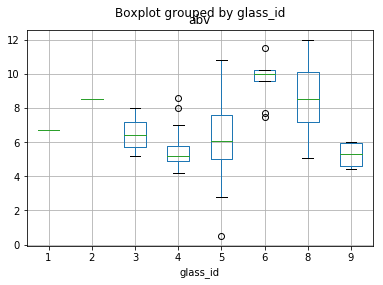

In [21]:
abv_glass = beer_glass.boxplot('abv', "glass_id")
abv_glass

In [47]:
abv_data = beer_data[beer_data["abv"].notna()]
abv_data['abv']=pd.to_numeric(abv_data['abv'])
# print(abv_data.shape)
# abv_data.head()

avg_abv = abv_data['abv'].mean()
avg_abv = '{0:.3}'.format(avg_abv)

C:\Users\sponr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


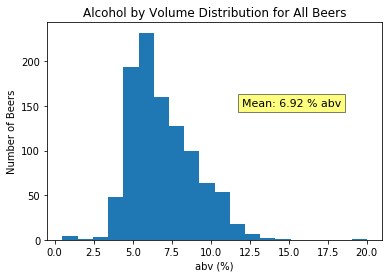

In [59]:
#Make a histogram
plt.hist(abv_data['abv'], bins=20)

#Chart elements
plt.title(f"Alcohol by Volume Distribution for All Beers")
plt.xlabel('abv (%)')
plt.ylabel('Number of Beers')
plt.grid(False)
plt.text(12, 150, f"Mean: {avg_abv} % abv", bbox=dict(facecolor='yellow', alpha=0.5), fontsize=11)

#Save and print
plt.savefig("Alcohol by Volume Distribution for All Beers.png")
plt.show()